In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

company                           94.306893
agent                             13.686238
city                               0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
total_of_special_requests          0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_canceled                        0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_weekdays_nights           0.000000
stays_in_weekend_nights         

In [7]:
#Handling Missing Value
#Impute missing values with 0 for numericals and Unknown for categoricals
df['children'].fillna(0, inplace = True)
df['agent'].fillna(0, inplace = True) 
df['company'].fillna(0, inplace = True)
df['city'].fillna('Unknown', inplace = True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
#Change data type which had null before
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [9]:
#Check the value of meal
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [10]:
#Replace 'Undefined' in meal with 'No Meal'
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')

In [11]:
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: count, dtype: int64

In [12]:
#Drop unnecessary data
#Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('Data with 0 guest: {0} out of {1} all data'.format(df[df['total_guests'] == 0].shape[0], df.shape[0]))
#Create new column 'stay_duration' from the combination of 'stays_in_weekend_nights' and 'stays_in_weekdays_nights'
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data with 0 night: {0} out of {1} all data'.format(df[df['stay_duration'] == 0].shape[0], df.shape[0]))
#Remove unnecessary data
df_clean = df[(df['total_guests'] > 0) & (df['stay_duration'] > 0)].copy()

print('before pre-processing:', df.shape[0])
print('after pre-processing:', df_clean.shape[0])

Data with 0 guest: 180 out of 119390 all data
Data with 0 night: 715 out of 119390 all data
before pre-processing: 119390
after pre-processing: 118565


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118565 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118565 non-null  object 
 1   is_canceled                     118565 non-null  int64  
 2   lead_time                       118565 non-null  int64  
 3   arrival_date_year               118565 non-null  int64  
 4   arrival_date_month              118565 non-null  object 
 5   arrival_date_week_number        118565 non-null  int64  
 6   arrival_date_day_of_month       118565 non-null  int64  
 7   stays_in_weekend_nights         118565 non-null  int64  
 8   stays_in_weekdays_nights        118565 non-null  int64  
 9   adults                          118565 non-null  int64  
 10  children                        118565 non-null  int64  
 11  babies                          118565 non-null  int64  
 12  meal                 

# Monthly Hotel Booking Analysis Based on Hotel Type

In [14]:
#Total bookings per month by hotel type
hotel_per_month = df_clean.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
hotel_per_month

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4917
1,City Hotel,August,2,7874
2,City Hotel,December,2,7554
3,City Hotel,February,2,4097
4,City Hotel,January,2,4309
5,City Hotel,July,2,8184
6,City Hotel,June,2,7458
7,City Hotel,March,2,3712
8,City Hotel,May,2,6411
9,City Hotel,November,2,7377


## Data Normalize

In [15]:
#Average by divide count per nunique 
hotel_per_month['average'] = round(hotel_per_month['count']/hotel_per_month['nunique'])
hotel_per_month

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4917,2458.0
1,City Hotel,August,2,7874,3937.0
2,City Hotel,December,2,7554,3777.0
3,City Hotel,February,2,4097,2048.0
4,City Hotel,January,2,4309,2154.0
5,City Hotel,July,2,8184,4092.0
6,City Hotel,June,2,7458,3729.0
7,City Hotel,March,2,3712,1856.0
8,City Hotel,May,2,6411,3206.0
9,City Hotel,November,2,7377,3688.0


## Data Sort by Month

In [16]:
hotel_per_month['month'] = hotel_per_month['arrival_date_month'].str[:3] #get 3 first words of month
hotel_per_month['month'] = pd.Categorical(hotel_per_month['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) #sort by categories
hotel_per_month.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4309,2154.0,Jan
16,Resort Hotel,January,2,2403,1202.0,Jan
3,City Hotel,February,2,4097,2048.0,Feb
15,Resort Hotel,February,2,2592,1296.0,Feb
7,City Hotel,March,2,3712,1856.0,Mar
19,Resort Hotel,March,2,2159,1080.0,Mar
0,City Hotel,April,2,4917,2458.0,Apr
12,Resort Hotel,April,2,3081,1540.0,Apr
20,Resort Hotel,May,2,3305,1652.0,May
8,City Hotel,May,2,6411,3206.0,May


In [17]:
df_clean.arrival_date_year.unique()

array([2017, 2018, 2019], dtype=int64)

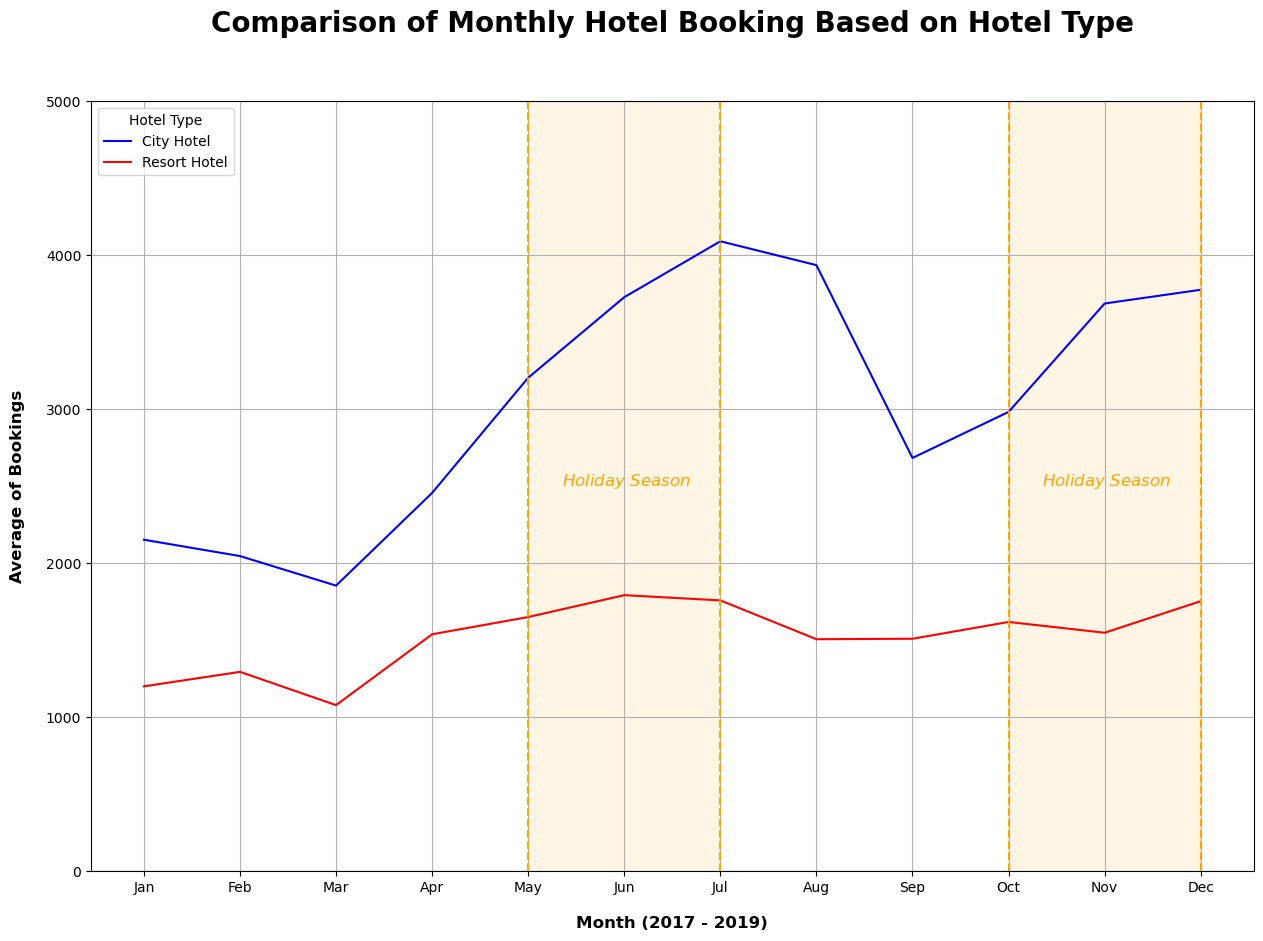

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='average', hue='hotel', data=hotel_per_month, palette=['blue', 'red'])

#Set title, caption and legend
plt.grid()
plt.title('Comparison of Monthly Hotel Booking Based on Hotel Type', fontsize=20, fontweight='bold', pad=50)
plt.legend(title='Hotel Type')

#Set label
plt.xlabel('Month (2017 - 2019)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average of Bookings', fontsize=12, fontweight='bold', labelpad=15)
plt.ylim(0,5000)



#Set holiday season
plt.axvline(x=4, color='orange', ls='--')
plt.axvline(x=6, color='orange', ls='--')
plt.stackplot([4, 5, 6], [5000], color='orange', alpha=0.1)
plt.text(x=4.35, y=2500, s='$\it{Holiday}$ $\it{Season}$', fontsize=12, color='orange')

#Set holiday season
plt.axvline(x=9, color='orange', ls='--')
plt.axvline(x=11, color='orange', ls='--')
plt.stackplot([9, 10, 11], [5000], color='orange', alpha=0.1)
plt.text(x=9.35, y=2500, s='$\it{Holiday}$ $\it{Season}$', fontsize=12, color='orange');

#Save to image
plt.savefig('Monthly Hotel Booking Based on Hotel Type.png')

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Stay Duration

In [19]:
df_clean['stays_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stays_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,Personal,75.0,0,0,Check-Out,1,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,Personal,98.0,0,1,Check-Out,2,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,Personal,98.0,0,1,Check-Out,2,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,Personal,107.0,0,0,Check-Out,2,2,2


## Grouping Stay Duration

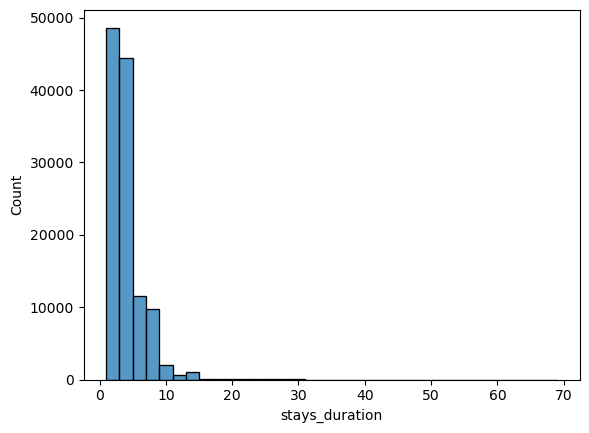

In [20]:
sns.histplot(df_clean['stays_duration'], binwidth=2);

In [21]:
df_clean['stays_duration_group'] = np.where(df_clean['stays_duration']>=20,20,np.where(df_clean['stays_duration']>=15,15,df_clean['stays_duration']))
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,stays_duration,stays_duration_group
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,Personal,75.0,0,0,Check-Out,1,1,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,Personal,75.0,0,0,Check-Out,1,1,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.0,0,1,Check-Out,2,2,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.0,0,1,Check-Out,2,2,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,Personal,107.0,0,0,Check-Out,2,2,2,2


## Comparison Cancellation of Hotel Bookings Toward Duration on Hotel Type

In [22]:
df_clean.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [23]:
cancel_group = df_clean.groupby(['hotel', 'is_canceled', 'stays_duration_group'])['arrival_date_year'].count().reset_index()
cancel_pivot = pd.pivot_table(cancel_group,
                              index=['hotel', 'stays_duration_group'],
                              columns='is_canceled',
                              values='arrival_date_year'
                             ).reset_index()
cancel_pivot.columns = ['hotel', 'stays_duration_group', 'is_not_canceled', 'is_canceled']
cancel_pivot
cancel_pivot['percentage'] = round(cancel_pivot['is_canceled'] / (cancel_pivot['is_not_canceled'] + cancel_pivot['is_canceled'])*100,2)
cancel_pivot

,hotel,stays_duration_group,is_not_canceled,is_canceled,percentage
0,City Hotel,1,9155.0,4103.0,30.95
1,City Hotel,2,10983.0,10432.0,48.71
2,City Hotel,3,11889.0,9482.0,44.37
3,City Hotel,4,7694.0,4853.0,38.68
4,City Hotel,5,3210.0,1775.0,35.61
5,City Hotel,6,1111.0,938.0,45.78
6,City Hotel,7,1245.0,808.0,39.36
7,City Hotel,8,205.0,176.0,46.19
8,City Hotel,9,119.0,93.0,43.87
9,City Hotel,10,80.0,116.0,59.18


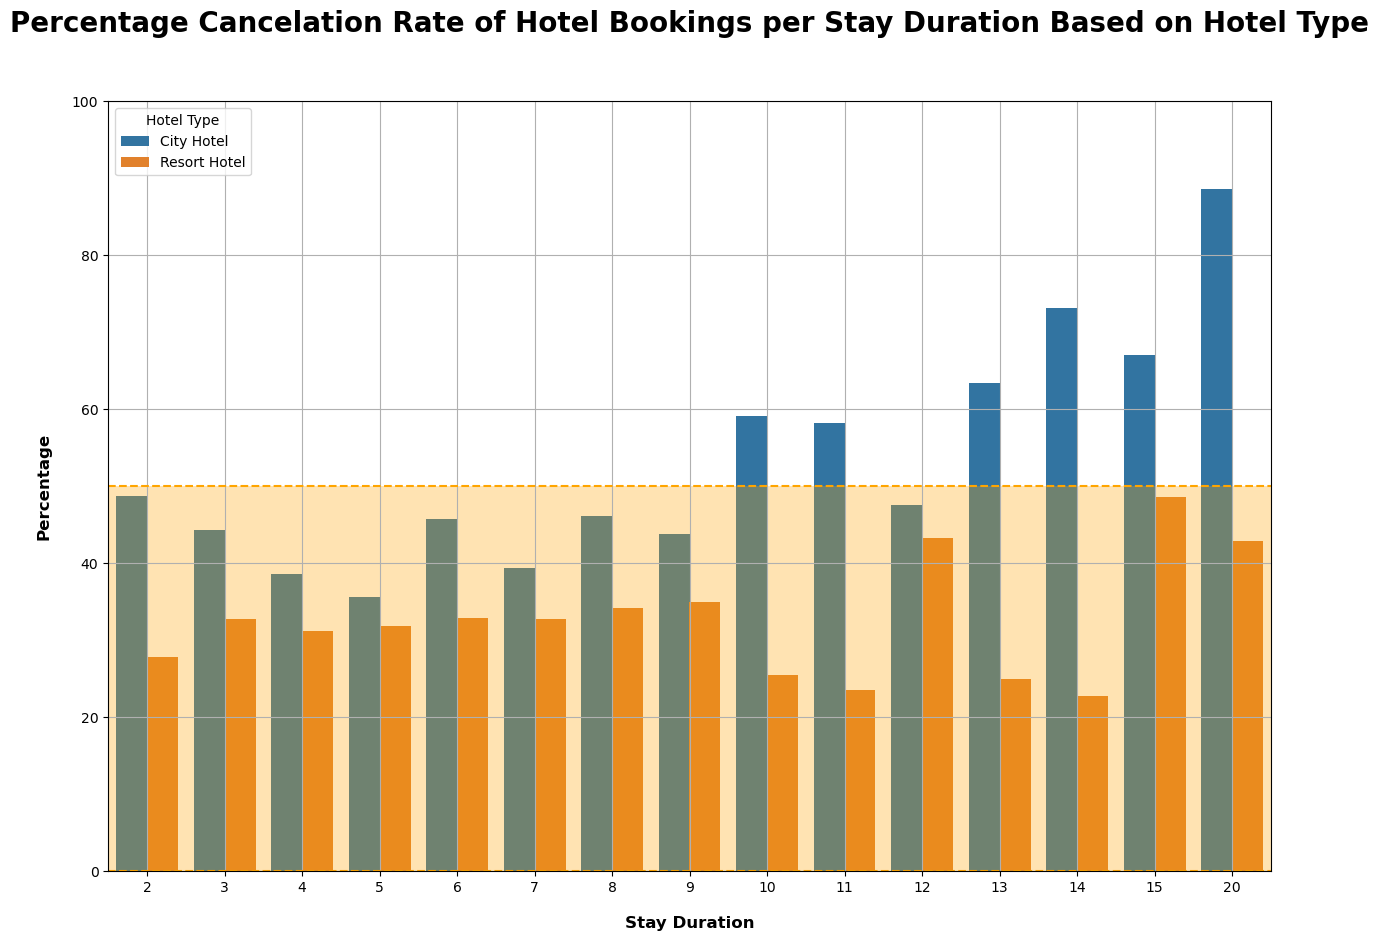

In [24]:
x = cancel_pivot['stays_duration_group']
y = cancel_pivot['percentage']
z = cancel_pivot['hotel']

#Distribution using barplot
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, hue=z, data=cancel_pivot)
plt.grid()

#Set title, caption, legend
plt.title('Percentage Cancelation Rate of Hotel Bookings per Stay Duration Based on Hotel Type', fontsize=20, fontweight='bold', pad=50)
plt.legend(title='Hotel Type', loc='upper left')

#Set label and limitation
plt.xlabel('Stay Duration', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Percentage', fontsize=12, fontweight='bold', labelpad=15)
plt.ylim(0,100)
plt.xlim(0.5,)

#Annotate
plt.axhline(y=0, color='orange', ls='--')
plt.axhline(y=50, color='orange', ls='--')
plt.stackplot([0,20], 50, colors=('orange',), alpha=0.3)

#Save file
plt.savefig('Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates Visualization.png')

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

<Axes: xlabel='lead_time', ylabel='Count'>

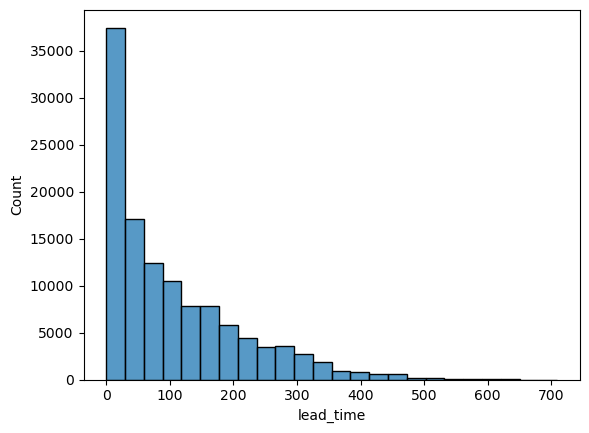

In [25]:
sns.histplot(x='lead_time', data=df_clean, binwidth=30)

In [26]:
lead_time_list=[]
for i in df_clean['lead_time']:
    if i <= 30:
        lead_group = '1 Month'
    elif i >= 31 and i <= 120:
        lead_group = '2-4 Months'
    elif i >= 121 and i <= 210:
        lead_group = '5-7 Months'
    elif i >= 211 and i <= 300:
        lead_group = '8-10 Months'
    elif i >= 311 and i <= 360:
        lead_group = '11-12 Months'
    else: 
        lead_group = '>12 Months'
    lead_time_list.append(lead_group)
df_clean['lead_time_group'] = lead_time_list

In [27]:
hotel_lead_time = df_clean.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='bookings')
hotel_lead_time = pd.pivot_table(hotel_lead_time,
                                 index = ['hotel','lead_time_group'], 
                                 columns = 'is_canceled', 
                                 values = 'bookings'
                                ).reset_index()
hotel_lead_time.columns = ['hotel', 'lead_time_group', 'is_not_canceled', 'is_canceled']
hotel_lead_time['percentage'] = round(hotel_lead_time['is_canceled'] / ((hotel_lead_time['is_not_canceled'] + hotel_lead_time['is_canceled']))*100, 2)
hotel_lead_time

,hotel,lead_time_group,is_not_canceled,is_canceled,percentage
0,City Hotel,1 Month,17848.0,5174.0,22.47
1,City Hotel,11-12 Months,566.0,1940.0,77.41
2,City Hotel,2-4 Months,16406.0,11783.0,41.80
3,City Hotel,5-7 Months,7298.0,7051.0,49.14
4,City Hotel,8-10 Months,2760.0,4376.0,61.32
5,City Hotel,>12 Months,955.0,2742.0,74.17
6,Resort Hotel,1 Month,13096.0,1976.0,13.11
7,Resort Hotel,11-12 Months,513.0,395.0,43.50
8,Resort Hotel,2-4 Months,7663.0,3999.0,34.29
9,Resort Hotel,5-7 Months,4585.0,2685.0,36.93


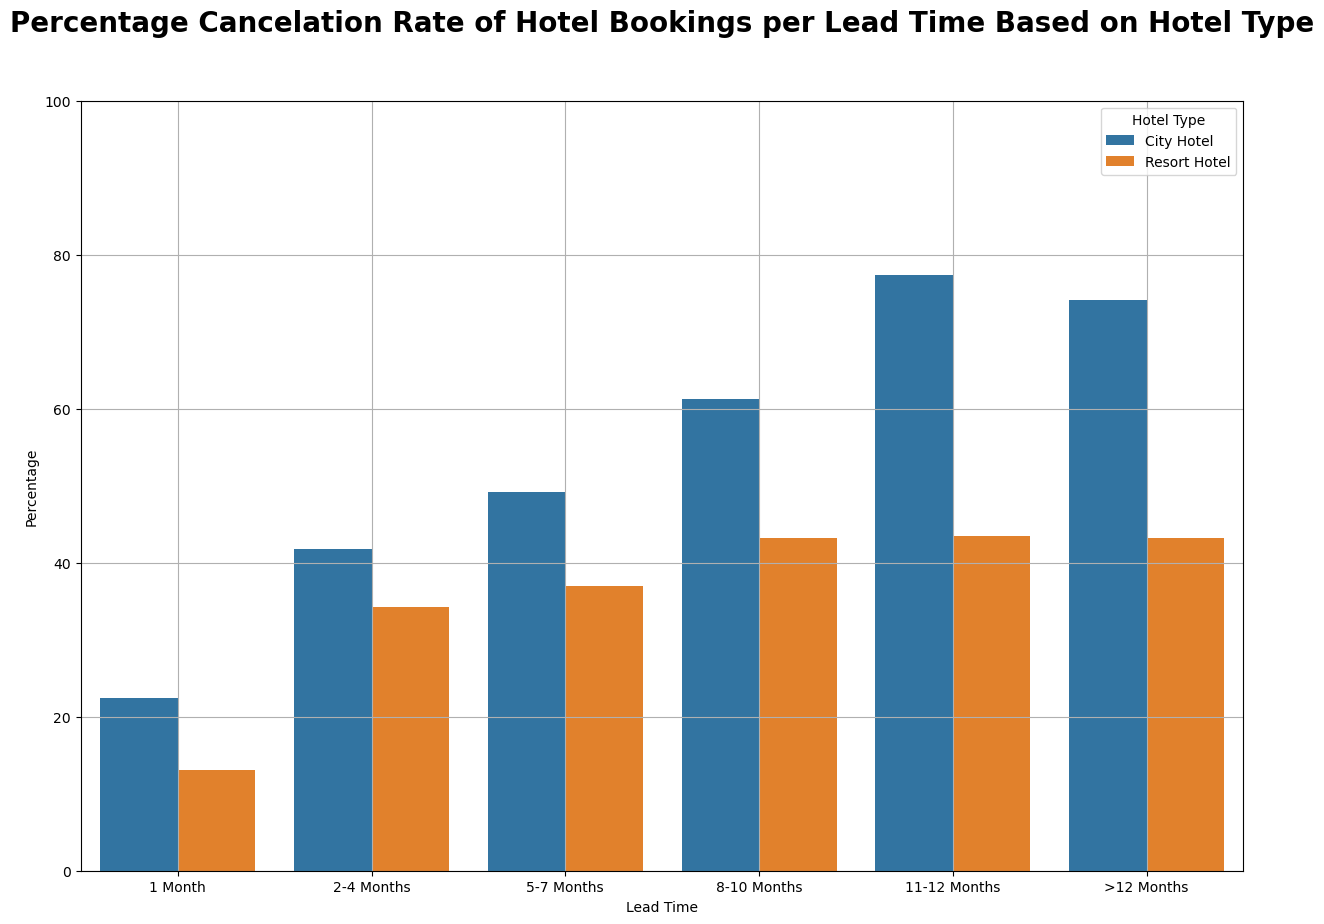

In [28]:
percentage = hotel_lead_time['percentage']
lead_time = hotel_lead_time['lead_time_group']
hotel = hotel_lead_time['hotel']

plt.figure(figsize=(15,10))
sns.barplot(x=lead_time, y=percentage, hue=hotel, data=hotel_lead_time, order=['1 Month', '2-4 Months', '5-7 Months', '8-10 Months', '11-12 Months', '>12 Months'])
plt.grid()

plt.title('Percentage Cancelation Rate of Hotel Bookings per Lead Time Based on Hotel Type', fontsize=20, fontweight='bold', pad=50)  
plt.legend(title='Hotel Type')

plt.xlabel('Lead Time')
plt.ylabel('Percentage')
plt.ylim(0, 100)

plt.savefig('Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate Visualization.png')